<a href="https://colab.research.google.com/github/01fe20bec308/Healthcare/blob/main/ISHA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, GlobalAveragePooling2D
from keras.applications.densenet import DenseNet121
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
train_dir = '/content/drive/MyDrive/chest_xray/chest_xray/train'
validation_dir = '/content/drive/MyDrive/chest_xray/chest_xray/val'
test_dir = '/content/drive/MyDrive/chest_xray/chest_xray/test'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)


In [3]:
img_size = 224
batch_size = 32


In [4]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary')


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [7]:
from tensorflow.keras.models import Model

In [5]:
base_model = DenseNet121(include_top=False, weights='imagenet', input_shape=(img_size, img_size, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)


29084464/29084464 [==============================] - 1s 0us/step


In [8]:
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [9]:
history = model.fit_generator(train_generator, 
                              epochs=10,
                              validation_data=validation_generator)


<ipython-input-9-b5cce287f42f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/10
163/163 [==============================] - 1309s 7s/step - loss: 0.1810 - accuracy: 0.9314 - val_loss: 17.1716 - val_accuracy: 0.5000
Epoch 2/10
163/163 [==============================] - 137s 836ms/step - loss: 0.1297 - accuracy: 0.9509 - val_loss: 417.0262 - val_accuracy: 0.5000
Epoch 3/10
163/163 [==============================] - 137s 841ms/step - loss: 0.1114 - accuracy: 0.9609 - val_loss: 0.4665 - val_accuracy: 0.6875
Epoch 4/10
163/163 [==============================] - 136s 830ms/step - loss: 0.0967 - accuracy: 0.9657 - val_loss: 2.0164 - val_accuracy: 0.5000
Epoch 5/10
163/163 [==============================] - 135s 827ms/step - loss: 0.0961 - accuracy: 0.9672 - val_loss: 6.1260 - val_accuracy: 0.5000
Epoch 6/10
163/163 [==============================] - 137s 836ms/step - loss: 0.0812 - accuracy: 0.9699 - val_loss: 0.4327 - val_accuracy: 0.8125
Epoch 7/10
163/163 [==============================] - 136s 831ms/step - loss: 0.0820 - accuracy: 0.9672 - val_loss: 3.3895 

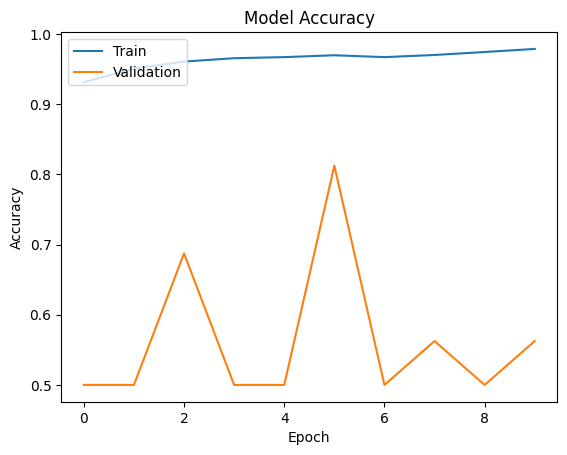

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


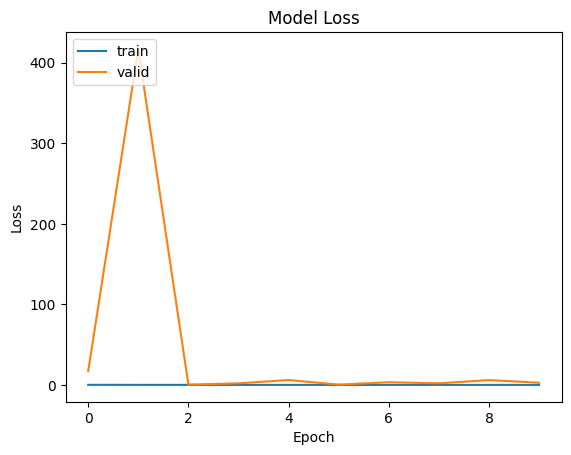

In [13]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [16]:
# evaluate the model on test data
test_loss, test_acc = model.evaluate(test_generator, verbose=1)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

20/20 [==============================] - 9s 391ms/step - loss: 2.0627 - accuracy: 0.5737
Test loss: 2.0627191066741943
Test accuracy: 0.5737179517745972


In [17]:
# get predictions
test_generator.reset()
pred_prob = model.predict(test_generator)
pred_classes = (pred_prob > 0.5).astype(int)


20/20 [==============================] - 8s 396ms/step


In [11]:
y_pred = model.predict(test_generator)
y_pred = np.round(y_pred)
print('Classification Report')
print(classification_report(test_generator.classes, y_pred))
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))


20/20 [==============================] - 131s 7s/step
Classification Report
              precision    recall  f1-score   support

           0       0.37      0.79      0.50       234
           1       0.60      0.19      0.29       390

    accuracy                           0.42       624
   macro avg       0.49      0.49      0.40       624
weighted avg       0.52      0.42      0.37       624

Confusion Matrix
[[184  50]
 [314  76]]
